### Analysis of Model Performance Across Datasets

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns

In [ ]:
df_list = []
for rs in range(0,5):
    for dataset in range(1,25):
        df = pd.read_csv(f"../LGG_CV-Prediction_Results/RS-{rs}_DS-{dataset}_Results/Results_Probs_Summary.csv")
        df["RS"] = str(rs)
        df["Dataset ID"] = str(dataset)
        df_list.append(df)

C:\Users\ottoc\AppData\Local\Temp\ipykernel_25740\2437373123.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(combined_df[combined_df["Model"]=="Ensemble"],x="Dataset ID",y="HR",palette="pastel",saturation=1,


<Axes: xlabel='Dataset ID', ylabel='HR'>

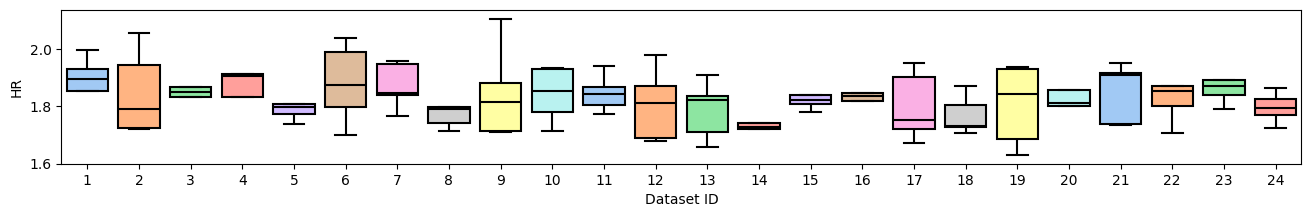

In [16]:
combined_df=pd.concat(df_list).drop(columns=["Unnamed: 0"])
fig, ax = plt.subplots(figsize=(16,2))
sns.boxplot(combined_df[combined_df["Model"]=="Ensemble"],x="Dataset ID",y="HR",palette="pastel",saturation=1,
            linecolor="black",
            linewidth=1.5,
            fliersize=0,)

In [17]:
combined_df["Model_DS"] = combined_df["Model"]+"_"+combined_df["Dataset ID"]
for var_of_interest in ["cindex","HR","roc_auc_mean","pr_auc_mean"]:
    combined_df[f"Model_Mean_{var_of_interest}"] = combined_df[["Model","Dataset ID",var_of_interest]].groupby(["Model","Dataset ID"])[var_of_interest].transform('mean')
    combined_df[f"DS_Mean_{var_of_interest}"] = combined_df[["Dataset ID",var_of_interest]].groupby(["Dataset ID"])[var_of_interest].transform('mean')

combined_df["cindex_rank"] = combined_df["DS_Mean_cindex"].rank(ascending=False,method='min')
combined_df["HR_rank"] = combined_df["DS_Mean_HR"].rank(ascending=False,method='min')
combined_df["ROC_rank"] = combined_df["DS_Mean_roc_auc_mean"].rank(ascending=False,method='min')
combined_df["PR_rank"] = combined_df["DS_Mean_pr_auc_mean"].rank(ascending=False,method='min')
combined_df["combined_rank"] = combined_df[["cindex_rank","HR_rank","ROC_rank","PR_rank"]].mean(axis=1)

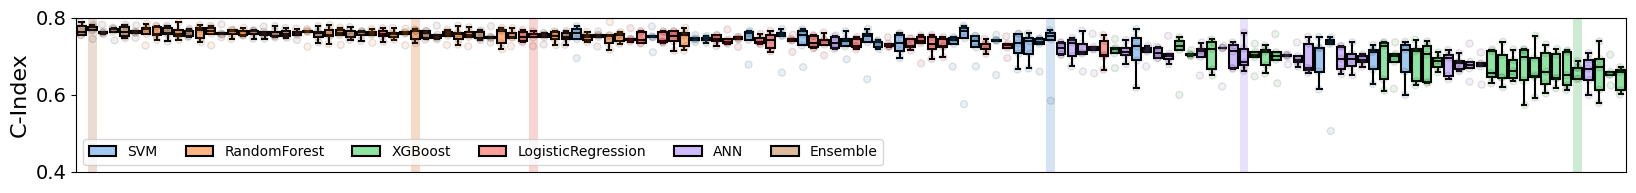

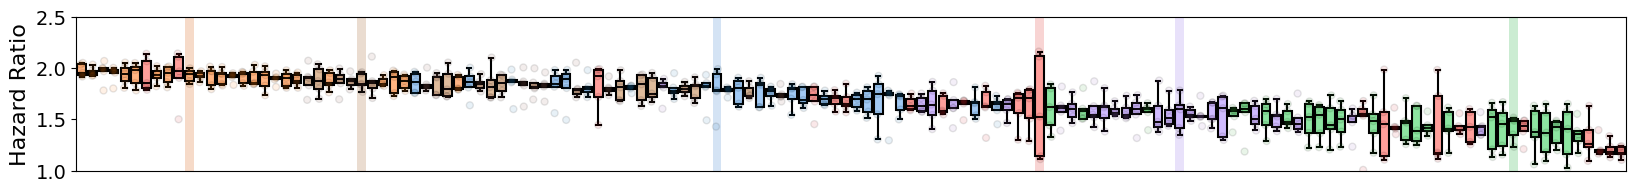

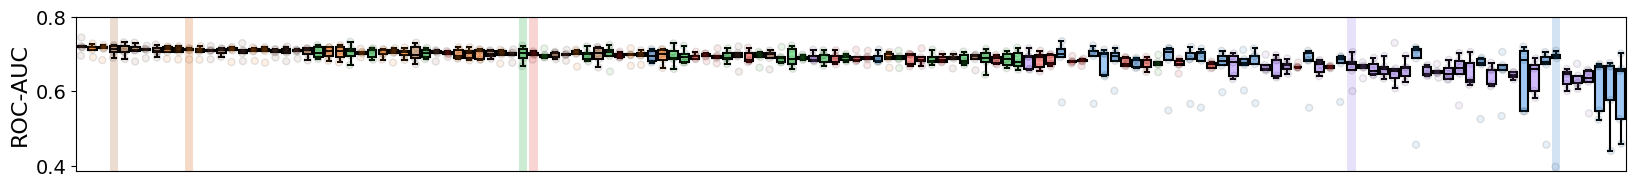

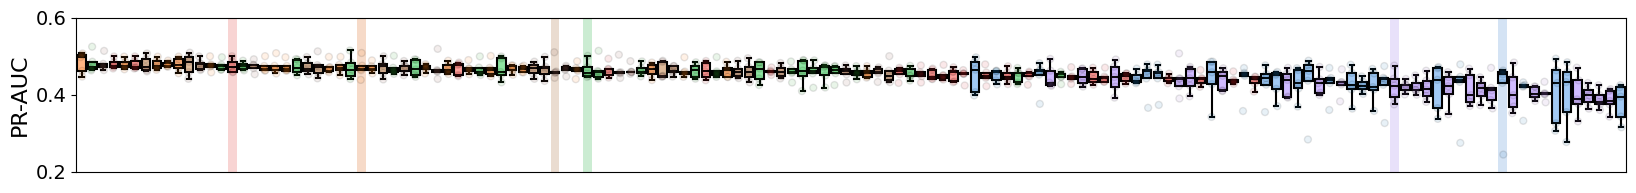

In [5]:
for model_mean, var_of_interest in [["Model_Mean_cindex","cindex"],["Model_Mean_HR","HR"],["Model_Mean_roc_auc_mean","roc_auc_mean"],["Model_Mean_pr_auc_mean","pr_auc_mean"]]:
    if var_of_interest == "cindex":
        leg_status = True
    else:
        leg_status = False
    plotting_df = combined_df.copy()
    plotting_df["DS_Label"] = plotting_df["Dataset ID"]=="7"
    plotting_df["DS_Label"] = plotting_df["DS_Label"] * 5
    fig, ax = plt.subplots(figsize=(20,2))
    sns.boxplot(plotting_df.sort_values(by=model_mean,ascending=False),x="Model_DS",y=var_of_interest,
                hue="Model",hue_order=["SVM","RandomForest","XGBoost","LogisticRegression","ANN","Ensemble"],palette="pastel",saturation=1,
                linecolor="black",
                linewidth=1.5,
                fliersize=0,
                legend=leg_status)
    sns.stripplot(plotting_df.sort_values(by=model_mean,ascending=False),x="Model_DS",y=var_of_interest,
                hue="Model",hue_order=["SVM","RandomForest","XGBoost","LogisticRegression","ANN","Ensemble"],palette="tab10",edgecolor="black",linewidth=1,alpha=0.1,legend=False)
    sns.barplot(plotting_df.sort_values(by=model_mean,ascending=False),x="Model_DS",y="DS_Label",hue="Model",hue_order=["SVM","RandomForest","XGBoost","LogisticRegression","ANN","Ensemble"],palette="pastel",alpha=0.5,
                legend=False)
    if var_of_interest == "cindex":
        y_title = "C-Index"
    elif var_of_interest == "HR":
        y_title = "Hazard Ratio"
    elif var_of_interest == "roc_auc_mean":
        y_title = "ROC-AUC"
    elif var_of_interest == "pr_auc_mean":
        y_title = "PR-AUC"
    plt.ylabel(y_title,fontsize=16)
    plt.ylim(plotting_df[var_of_interest].min()-0.01,plotting_df[var_of_interest].max()+0.01)
    plt.xlabel("")
    if var_of_interest == "cindex":
        plt.yticks([0.4,0.6,0.8])
    elif var_of_interest == "HR":
        plt.yticks([1.0,1.5,2.0,2.5])
    elif var_of_interest == "roc_auc_mean":
        plt.yticks([0.4,0.6,0.8])
    elif var_of_interest == "pr_auc_mean":
        plt.yticks([0.2,0.4,0.6])
    plt.tick_params(axis='y',labelsize=14)
    plt.xticks(labels=[],ticks=[])
    if leg_status == True:
        plt.legend(ncol=6,loc="lower left")
        ax.get_legend().set_title("")
    plt.show()

In [6]:
combined_df=pd.concat(df_list).drop(columns=["Unnamed: 0"])
combined_df = combined_df[combined_df["Model"]=="Ensemble"]
combined_df["Model_DS"] = combined_df["Model"]+"_"+combined_df["Dataset ID"]
for var_of_interest in ["cindex","HR","roc_auc_mean","pr_auc_mean"]:
    combined_df[f"Model_Mean_{var_of_interest}"] = combined_df[["Model","Dataset ID",var_of_interest]].groupby(["Model","Dataset ID"])[var_of_interest].transform('mean')
    combined_df[f"DS_Mean_{var_of_interest}"] = combined_df[["Dataset ID",var_of_interest]].groupby(["Dataset ID"])[var_of_interest].transform('mean')

combined_df["cindex_rank"] = combined_df["DS_Mean_cindex"].rank(ascending=False,method='min')
combined_df["HR_rank"] = combined_df["DS_Mean_HR"].rank(ascending=False,method='min')
combined_df["ROC_rank"] = combined_df["DS_Mean_roc_auc_mean"].rank(ascending=False,method='min')
combined_df["PR_rank"] = combined_df["DS_Mean_pr_auc_mean"].rank(ascending=False,method='min')
combined_df["combined_rank"] = combined_df[["cindex_rank","HR_rank","ROC_rank","PR_rank"]].mean(axis=1)

Text(0.5, 1.0, 'Average Dataset Ranking for Ensemble Model (cindex, HR, ROC-AUC, PR-AUC)')

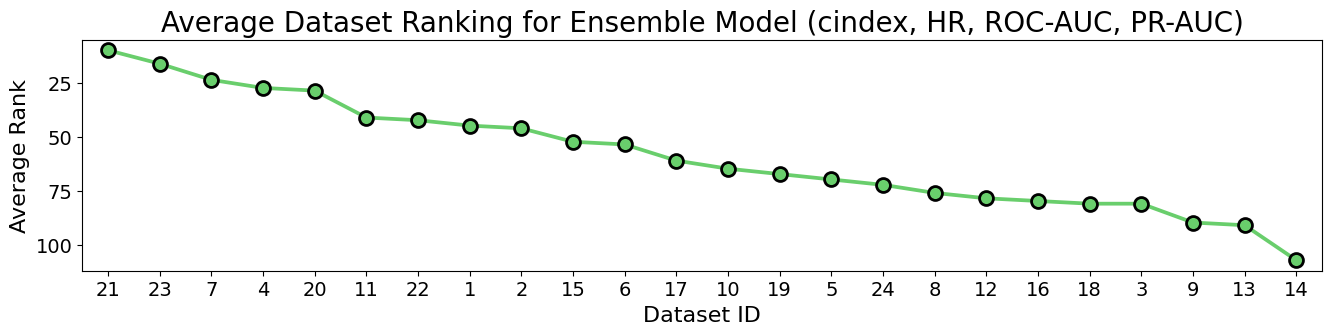

In [7]:
fig, ax = plt.subplots(figsize=(16,3))
sns.pointplot(combined_df.sort_values(by="combined_rank"),x="Dataset ID",y="combined_rank",markeredgecolor="black",markeredgewidth=2,markersize=10,color="#69CE6C")
ax.invert_yaxis()
plt.ylabel("Average Rank",fontsize=16)
plt.xlabel("Dataset ID",fontsize=16)
plt.tick_params(axis='both',labelsize=14)
plt.title("Average Dataset Ranking for Ensemble Model (cindex, HR, ROC-AUC, PR-AUC)",fontsize=20)

In [8]:
ensemble_df = combined_df[combined_df["Model"]=="Ensemble"].copy()

In [18]:
combined_df[["Dataset ID","Model","cindex"]].groupby(["Model","Dataset ID"]).mean().sort_values(by="cindex",ascending=False)

cindex
Model    Dataset ID          
Ensemble 21          0.767559
         7           0.767331
         6           0.764482
         23          0.763502
         20          0.763109
...                       ...
XGBoost  7           0.661432
ANN      3           0.660190
XGBoost  20          0.658014
         6           0.657596
         12          0.640865

[144 rows x 1 columns]

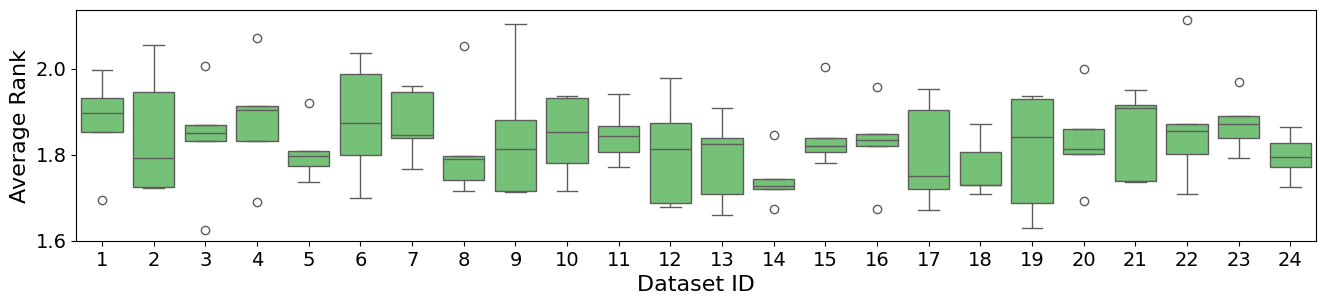

In [10]:
fig, ax = plt.subplots(figsize=(16,3))
sns.boxplot(ensemble_df,x="Dataset ID",y="HR",color="#69CE6C")
plt.ylabel("Average Rank",fontsize=16)
plt.xlabel("Dataset ID",fontsize=16)
plt.tick_params(axis='both',labelsize=14)

<Axes: xlabel='Dataset ID', ylabel='cindex'>

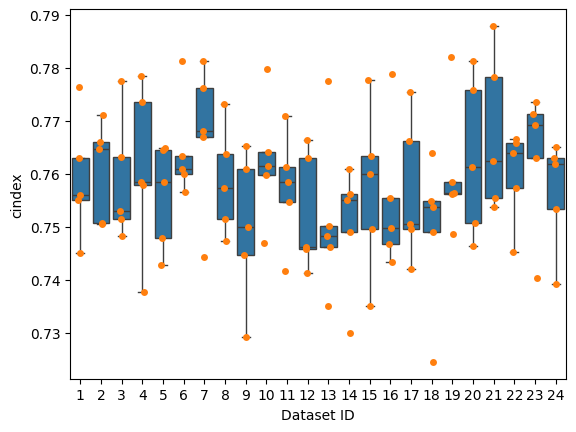

In [11]:
sns.boxplot(ensemble_df,x="Dataset ID",y="cindex",fliersize=0)
sns.stripplot(ensemble_df,x="Dataset ID",y="cindex")

In [12]:
combined_df[["Model", "cindex"]].groupby(["Model"]).mean()

,cindex
Model,
Ensemble,0.758275


In [13]:
combined_df.sort_values(by="combined_rank")[["Model","RS","Dataset ID","combined_rank"]]

,Model,RS,Dataset ID,combined_rank
5,Ensemble,1,21,9.75
5,Ensemble,4,21,9.75
5,Ensemble,0,21,9.75
5,Ensemble,2,21,9.75
5,Ensemble,3,21,9.75
...,...,...,...,...
5,Ensemble,4,14,107.25
5,Ensemble,1,14,107.25
5,Ensemble,3,14,107.25
5,Ensemble,2,14,107.25
